#Step 1: Installation and Setup

In [2]:
pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 25kB/s 


In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.5.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Step 2: Data Preprocessing

In [6]:
# Importing the Dataset

from tensorflow.keras.datasets import fashion_mnist

In [7]:
# Loading Datsets

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
np.max(x_train)

255

In [12]:
np.min(x_train)

0

In [13]:
np.mean(x_train)

72.94035223214286

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
np.max(y_train)

9

In [16]:
np.min(y_train)

0

In [17]:
np.mean(y_train)

4.5

In [18]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover','3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


# Data Exploration

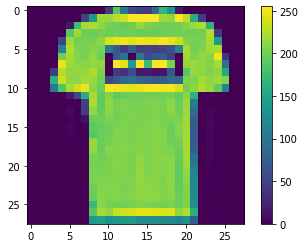

In [19]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [20]:
y_train[1]

0

In [21]:
# Normalizing the Dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

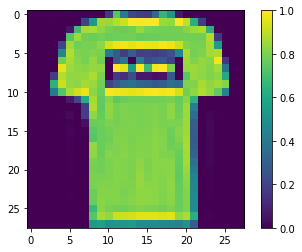

In [22]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [23]:
# Flattening the Dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [25]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# step 3: Building Model

In [27]:
# Define an Object
model = tf.keras.models.Sequential()
# Sequence of Layers

In [28]:
# Adding first fully connected hidden layer
# 1) Units (No of Neurons) = 128
# 2) Activation Function = ReLU
# 3) Input Shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [29]:
# Adding the second layers with Dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [30]:
# Adding the output layers
# 1) Units = 10
# 2) Activation = SoftMax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

#Step 4: Training the Model

In [31]:
# Compiling the Model
# 1) Optimizer - adam, (Minimize the Loss Funtion)
# 2) Loss Function = sparse_categorical_crossentropy, (Acts as Guide to Optimizer)
# 3) Matrics = sparse_categorical_accuracy 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics={'sparse_categorical_accuracy'})

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5467 - accuracy: 0.8079
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4183 - accuracy: 0.8485
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3850 - accuracy: 0.8590
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3653 - accuracy: 0.8650
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3522 - accuracy: 0.8702
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3395 - accuracy: 0.8734
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3290 - accuracy: 0.8781
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3207 - accuracy: 0.8810
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3166 - accuracy: 0.8816
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3079 - accurac

# Step 5: Model Evaluation and Prediction

In [40]:
# Model Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

 85/313 [=======>......................] - ETA: 0s - loss: 0.3072 - accuracy: 0.8805

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 1s 1ms/step - loss: 0.3339 - accuracy: 0.8791


In [42]:
print('Test Accuracy : {}'.format(test_accuracy))

Test Accuracy : 0.8791000247001648


In [43]:
# Model Prediction
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [45]:
# Predicted Output
y_pred[0]

9

In [46]:
# Actual Output
y_test[0]

9

In [47]:
y_pred[0], y_test[0] # Predicted and Actual Output

(9, 9)

In [48]:
y_pred[110], y_test[110]

(2, 2)

In [49]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [50]:
# confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[840   1  21  17   3   1 109   0   8   0]
 [  1 973   3  16   4   0   2   0   1   0]
 [ 16   1 795  10 125   0  53   0   0   0]
 [ 26   8  10 893  28   1  30   0   4   0]
 [  0   0  88  29 815   0  68   0   0   0]
 [  1   0   0   0   0 958   0  24   2  15]
 [142   0 111  29  76   0 632   0  10   0]
 [  0   0   0   0   0  15   0 959   0  26]
 [  4   0   4   3   4   4   9   3 969   0]
 [  0   0   0   0   0   6   1  36   0 957]]


In [51]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8791
